In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
from matplotlib import rc

# %matplotlib inline

# 한글 폰트 설정 및 minus 기호 깨짐 수정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

raw_data = pd.read_csv('./Risk Profiling - rawdata.csv')

raw_data = raw_data[raw_data['d_age'].notnull()]
raw_data = raw_data[raw_data['d_gender'].notnull()]

raw_data['d_code'] = raw_data['d_code'].astype('float')
raw_data['cnt'] = raw_data['cnt'].astype('float')
raw_data['min_cover'] = raw_data['min_cover'].astype('float')
raw_data['max_cover'] = raw_data['max_cover'].astype('float')
raw_data['mdn_cover'] = raw_data['mdn_cover'].astype('float')
raw_data['min_insufee'] = raw_data['min_insufee'].astype('float')
raw_data['max_insufee'] = raw_data['max_insufee'].astype('float')
raw_data['mdn_insufee'] = raw_data['mdn_insufee'].astype('float')
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 110
Data columns (total 12 columns):
d_age              84 non-null float64
d_gender           84 non-null float64
d_code             84 non-null float64
cnt                84 non-null float64
min_cover          84 non-null float64
average_cover      84 non-null float64
max_cover          84 non-null float64
mdn_cover          84 non-null float64
min_insufee        84 non-null float64
average_insufee    84 non-null float64
max_insufee        84 non-null float64
mdn_insufee        84 non-null float64
dtypes: float64(12)
memory usage: 8.5 KB


,d_age,d_gender,d_code,cnt,min_cover,average_cover,max_cover,mdn_cover,min_insufee,average_insufee,max_insufee,mdn_insufee
count,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,84.000000,84.000000,8.400000e+01,84.000000
mean,35.000000,1.500000,4.000000,87733.345238,66821.428571,1.608267e+07,2.690276e+08,1.398810e+07,488.773810,90358.824640,1.051294e+07,75785.333333
std,17.180824,0.503003,2.012012,93687.445690,153330.115615,7.168557e+06,2.661543e+08,7.054852e+06,1956.992384,12689.119607,1.117424e+07,12362.199607
min,10.000000,1.000000,1.000000,985.000000,0.000000,3.243506e+06,4.000000e+07,2.000000e+06,0.000000,68499.895030,4.194250e+05,47580.000000
25%,20.000000,1.000000,2.000000,8285.250000,0.000000,1.009292e+07,6.000000e+07,1.000000e+07,0.000000,81469.716993,1.112488e+06,67440.000000
50%,35.000000,1.500000,4.000000,59181.500000,0.000000,1.692610e+07,1.425000e+08,1.000000e+07,0.000000,88335.663365,5.081850e+06,74390.000000
75%,50.000000,2.000000,6.000000,136387.250000,100000.000000,2.195591e+07,4.106538e+08,2.000000e+07,0.000000,97050.434420,2.025192e+07,83310.000000
max,60.000000,2.000000,7.000000,371512.000000,1000000.000000,2.950456e+07,8.888880e+08,3.000000e+07,10000.000000,126421.822100,2.920000e+07,106722.000000


# 연령별 3대 진단 가입자 수

## 목적 : 연령별 3대 진단 가입자들의 추이 파악을 위해

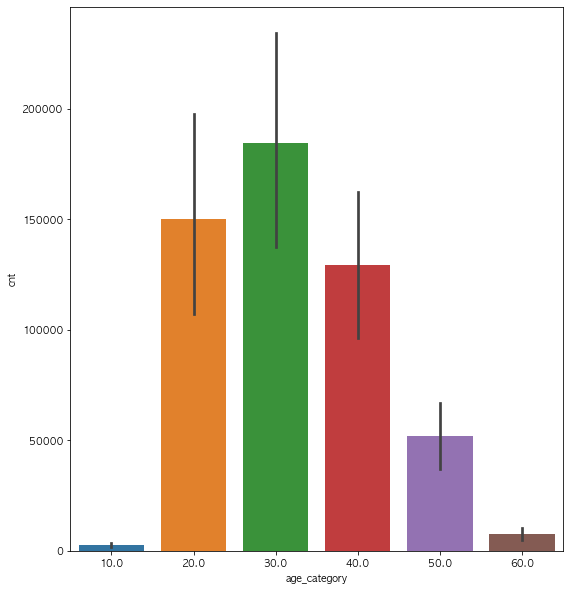

In [2]:
raw_data['age_category'] = raw_data['d_age']
plt.figure(figsize=[30,10])
plt.subplot(131)
sns.barplot('age_category', 'cnt', data=raw_data)

# 진단별 평균 가입자 수 
1 : 암진단<br>
2 : 소액암진단<br>
3 : 뇌출혈진단<br>
4 : 뇌졸중진단<br>
5 : 뇌혈관질환진단<br>
6 : 급성심근경색진단<br>
7 : 허혈설심장질환진단<br>

## 목적 : (연령을 제외하고) 어떤 보험에 중점적으로 가입하고 있는지 확인
### TODO
1. 이 중 실제로 반드시 가입해야하는 보험은 어떤 것이 있는지 확인
2. 위 3대 진단들은 연령대별로 가입해야하는 상황이 다른지 확인

그림에 나타나는 편차는 연령에 따른 편차임

## 의견
연령별-진단별 평균 가입자 수를 확인했을 때도 전체적인 흐름에서 벗어나지 않고, 암진단, 뇌졸중진단에 대한 가입자 수가 많은 상황
정민님께 듣기로, 진단?(보장?)의 범위를 보았을 때, 뇌출혈 < 뇌졸중 < 뇌혈관질환 이라고 함 -> 뇌혈관 질환을 가입하는 것이 더 좋다고 생각되는데 왜 뇌졸중 가입률이 더 많은가?
1. 보험사에서 뇌혈관질환의 경우 마진율이 떨어지기 때문에 판매하지 않으려한다?
2. 사람들이 뇌혈관질환에 가입하는 것이 더 좋다는 것을 모르고 있다?
3. 뇌혈관질환진단의 보험료가 비싸서 가입하기를 꺼려한다? (뇌졸중으로 적당한 타협?)
4. 상품이 나온지 얼마되지 않아 상대적으로 가입률이 낮은 상황(은주님)

3번과 같은 케이스라면, 뇌졸중진단의 범위에서 벗어나는 진단에 대한 리스크(치사율, 보험료)를 분석해야함<br>
만약 뇌혈관질환진단은 꼭 필요한 진단이라면(이것도 증명 필요) 뇌졸중에 대한 스코어를 낮추고, 뇌혈관질환에 대한 스코어를 높여서 보여줄 수 있어야하고, 이 스코어를 활용해 적극적인 푸쉬를 할 수 있을 것 같음

**허혈성심장질환진단도 동일한 경우인가?**

* 기존에 고객이 의문을 가질 수 있는 부분<br>
    * (다른 상담사는 뇌졸중을 가입하는 것이 좋다고 추천) & (토보서 매니저는 뇌혈관을 가입하는 것이 좋다고 추천)
    * 고객 입장에서는 데이터가 아닌 상담사의 말을 듣고 결정해야하고 어느쪽을 신뢰할지 결정하기 어려움
    * -> 상담사 간의 의견 충돌이 있을 경우 자신의 의견을 증명할 수단으로 사용할 수 있음


[Text(0, 0, '암'),
 Text(0, 0, '소액암'),
 Text(0, 0, '뇌출혈'),
 Text(0, 0, '뇌졸중'),
 Text(0, 0, '뇌혈관'),
 Text(0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0, 0, '암'),
 Text(0, 0, '소액암'),
 Text(0, 0, '뇌출혈'),
 Text(0, 0, '뇌졸중'),
 Text(0, 0, '뇌혈관'),
 Text(0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환')]

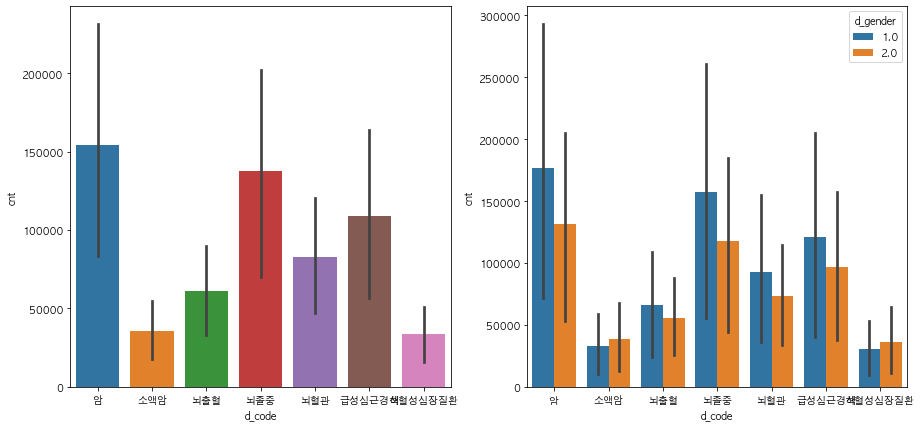

In [3]:
f, ax = plt.subplots(1, 2, figsize=(15,7))

sampling_data = pd.DataFrame(raw_data, columns=['d_age', 'd_code', 'd_gender', 'cnt'])

# 성별을 구분하지 않음
sns.barplot('d_code', 'cnt', data=sampling_data, ax=ax[0])

# 성별 구분
sns.barplot('d_code', 'cnt', hue='d_gender', data=sampling_data, ax=ax[1])
plt.setp(ax,xticklabels=['암','소액암','뇌출혈','뇌졸중','뇌혈관','급성심근경색','허혈성심장질환'])

# 연령별 진단별 평균 가입자 수 
1 : 암진단<br>
2 : 소액암진단<br>
3 : 뇌출혈진단<br>
4 : 뇌졸중진단<br>
5 : 뇌혈관질환진단<br>
6 : 급성심근경색진단<br>
7 : 허혈설심장질환진단<br>

표준편차는 성별에 의해 발생
1. 성별에 따른 편차가 꽤 있는 진단들(암, 뇌졸중, 뇌혈관, 급성심근경색)이 있는데 왜 이런건지? -> 이거 사실 큰 의미 없을 수도 있음
2. 60대의 경우 전체적으로 가입자 수가 낮은데 왜 이런건지?(50대와 비교했을 때 큰 차이, 보험사에서 안받아주나..?)

([<matplotlib.axis.XTick at 0x1a20ccfa50>,
 <a list of 7 Text xticklabel objects>)

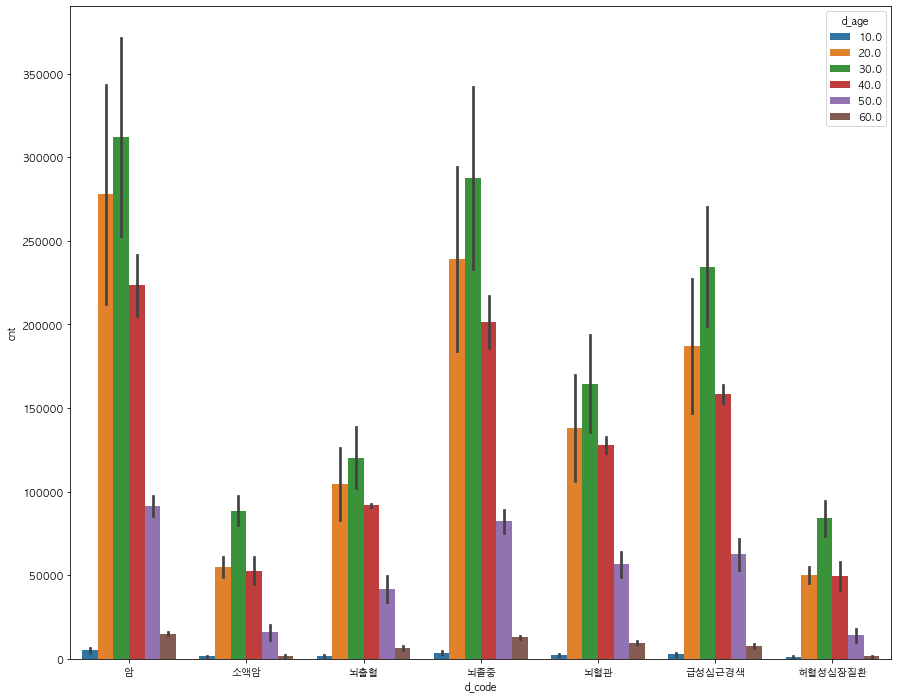

In [4]:
plt.figure(figsize=[50,12])
plt.subplot(131)

sns.barplot('d_code', 'cnt', hue='d_age', data=raw_data)
plt.xticks([0,1,2,3,4,5,6,],['암','소액암','뇌출혈','뇌졸중','뇌혈관','급성심근경색','허혈성심장질환'])

# 연령별 진단별 평균 가입자 수(서브플롯 분리 버전)
1 : 암진단<br>
2 : 소액암진단<br>
3 : 뇌출혈진단<br>
4 : 뇌졸중진단<br>
5 : 뇌혈관질환진단<br>
6 : 급성심근경색진단<br>
7 : 허혈설심장질환진단<br>

[Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성

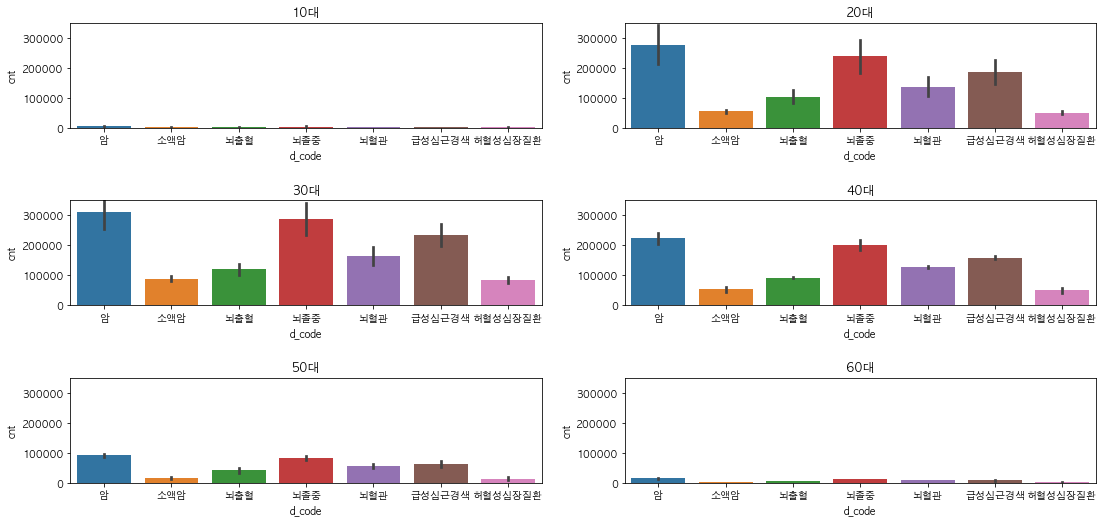

In [5]:
f, ax = plt.subplots(3, 2, figsize=(15,7))
plt.tight_layout(h_pad=5, w_pad=5)
# sampling_data = pd.DataFrame(raw_data, columns=['d_age', 'd_code', 'd_gender', 'cnt'])

# 성별을 구분하지 않음
# sns.barplot('d_code', 'cnt', data=sampling_data, ax=ax[0])


age_10_data = raw_data[raw_data['d_age'].isin(['10.0'])]
age_20_data = raw_data[raw_data['d_age'].isin(['20.0'])]
age_30_data = raw_data[raw_data['d_age'].isin(['30.0'])]
age_40_data = raw_data[raw_data['d_age'].isin(['40.0'])]
age_50_data = raw_data[raw_data['d_age'].isin(['50.0'])]
age_60_data = raw_data[raw_data['d_age'].isin(['60.0'])]

sns.barplot('d_code', 'cnt', data=age_10_data, ax=ax[0][0])
sns.barplot('d_code', 'cnt', data=age_20_data, ax=ax[0][1])
sns.barplot('d_code', 'cnt', data=age_30_data, ax=ax[1][0])
sns.barplot('d_code', 'cnt', data=age_40_data, ax=ax[1][1])
sns.barplot('d_code', 'cnt', data=age_50_data, ax=ax[2][0])
sns.barplot('d_code', 'cnt', data=age_60_data, ax=ax[2][1])

ax[0][0].title.set_text('10대')
ax[0][1].title.set_text('20대')
ax[1][0].title.set_text('30대')
ax[1][1].title.set_text('40대')
ax[2][0].title.set_text('50대')
ax[2][1].title.set_text('60대')

ax[0][0].set_ylim(0, 350000)
ax[0][1].set_ylim(0, 350000)
ax[1][0].set_ylim(0, 350000)
ax[1][1].set_ylim(0, 350000)
ax[2][0].set_ylim(0, 350000)
ax[2][1].set_ylim(0, 350000)

plt.setp(ax,xticklabels=['암','소액암','뇌출혈','뇌졸중','뇌혈관','급성심근경색','허혈성심장질환'])


# 연령별로 진단별 보장금액 

[Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성

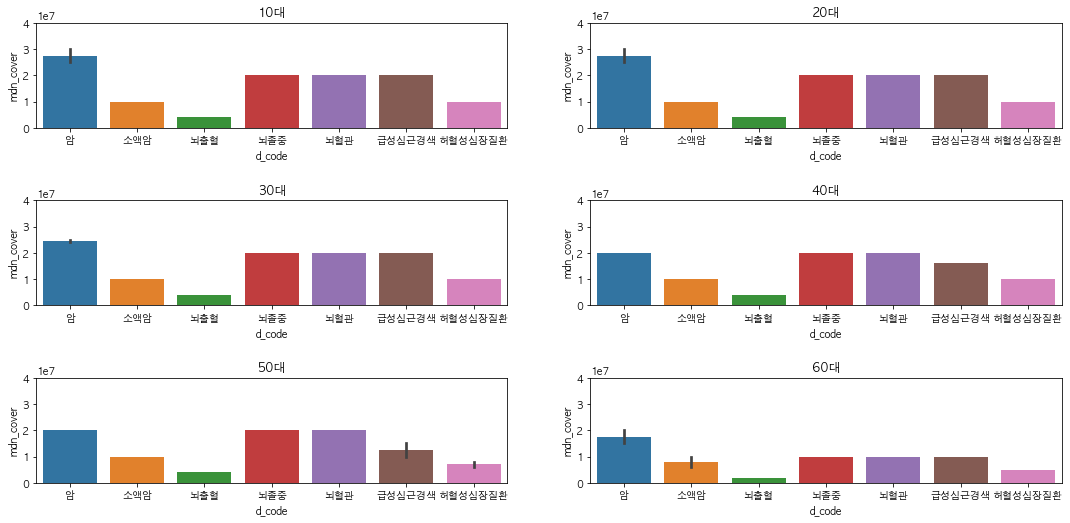

In [6]:
f, ax = plt.subplots(3, 2, figsize=(15,7))
plt.tight_layout(h_pad=5, w_pad=5)
# sampling_data = pd.DataFrame(raw_data, columns=['d_age', 'd_code', 'd_gender', 'cnt'])

# 성별을 구분하지 않음
# sns.barplot('d_code', 'cnt', data=sampling_data, ax=ax[0])


age_10_data = raw_data[raw_data['d_age'].isin(['10.0'])]
age_20_data = raw_data[raw_data['d_age'].isin(['20.0'])]
age_30_data = raw_data[raw_data['d_age'].isin(['30.0'])]
age_40_data = raw_data[raw_data['d_age'].isin(['40.0'])]
age_50_data = raw_data[raw_data['d_age'].isin(['50.0'])]
age_60_data = raw_data[raw_data['d_age'].isin(['60.0'])]

sns.barplot('d_code', 'mdn_cover', data=age_10_data, ax=ax[0][0])
sns.barplot('d_code', 'mdn_cover', data=age_20_data, ax=ax[0][1])
sns.barplot('d_code', 'mdn_cover', data=age_30_data, ax=ax[1][0])
sns.barplot('d_code', 'mdn_cover', data=age_40_data, ax=ax[1][1])
sns.barplot('d_code', 'mdn_cover', data=age_50_data, ax=ax[2][0])
sns.barplot('d_code', 'mdn_cover', data=age_60_data, ax=ax[2][1])

ax[0][0].title.set_text('10대')
ax[0][1].title.set_text('20대')
ax[1][0].title.set_text('30대')
ax[1][1].title.set_text('40대')
ax[2][0].title.set_text('50대')
ax[2][1].title.set_text('60대')

ax[0][0].set_ylim([0,40000000])
ax[0][1].set_ylim([0,40000000])
ax[1][0].set_ylim([0,40000000])
ax[1][1].set_ylim([0,40000000])
ax[2][0].set_ylim([0,40000000])
ax[2][1].set_ylim([0,40000000])
plt.setp(ax,xticklabels=['암','소액암','뇌출혈','뇌졸중','뇌혈관','급성심근경색','허혈성심장질환'])

# 연령별/진단별 보장 금액 중간값(approximately median)

연령별로 각 항목에 따라 보장금액의 차이가 큰지 확인하기 위함

## 의문
연령이 높을 수록 보장금액이 줄어드는 경향이 있는데 어떤 이유인지? 개인적인 생각으로는 연령이 높을수록 치료기간이 길어질 것 같고 그렇다면 픨요한 돈이 많을 텐데 보장금액은 왜 더 작은지?

([<matplotlib.axis.XTick at 0x1a2218fd50>,
 <a list of 7 Text xticklabel objects>)

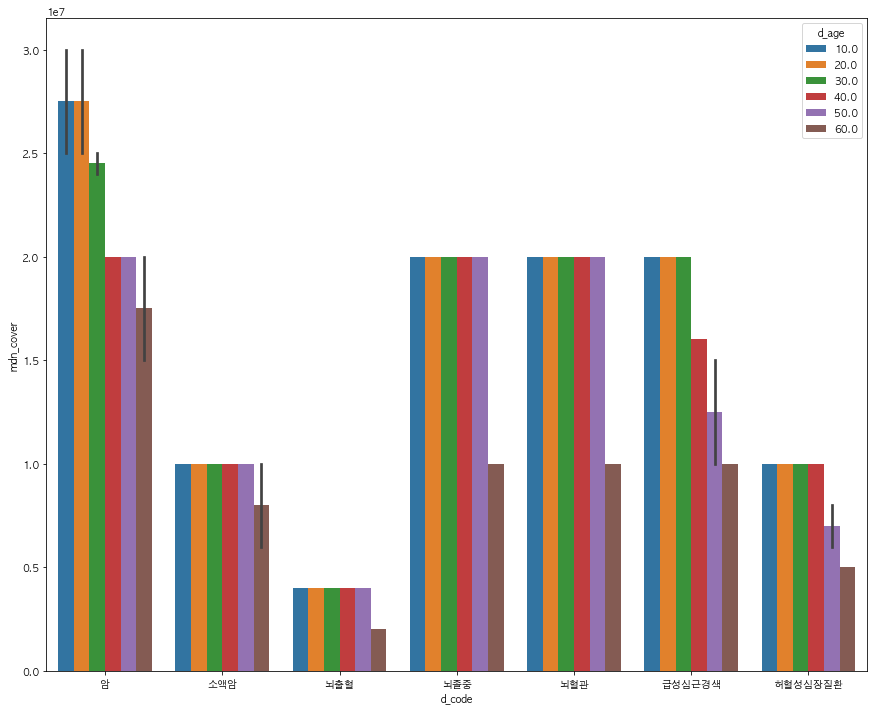

In [7]:
plt.figure(figsize=[50,12])
plt.subplot(131)

sns.barplot('d_code', 'mdn_cover', hue='d_age', data=raw_data)
plt.xticks([0,1,2,3,4,5,6],['암','소액암','뇌출혈','뇌졸중','뇌혈관','급성심근경색','허혈성심장질환'])

# 연령별/진단별 보험료
보장 금액에 따른 보험료의 status 를 확인하기 위해

## 의문
소액암과 뇌출혈의 경우 보장 금액이 그리 크지 않은 것 같은데 보험료는 상대적으로 비쌈

([<matplotlib.axis.XTick at 0x1a22cb5210>,
 <a list of 7 Text xticklabel objects>)

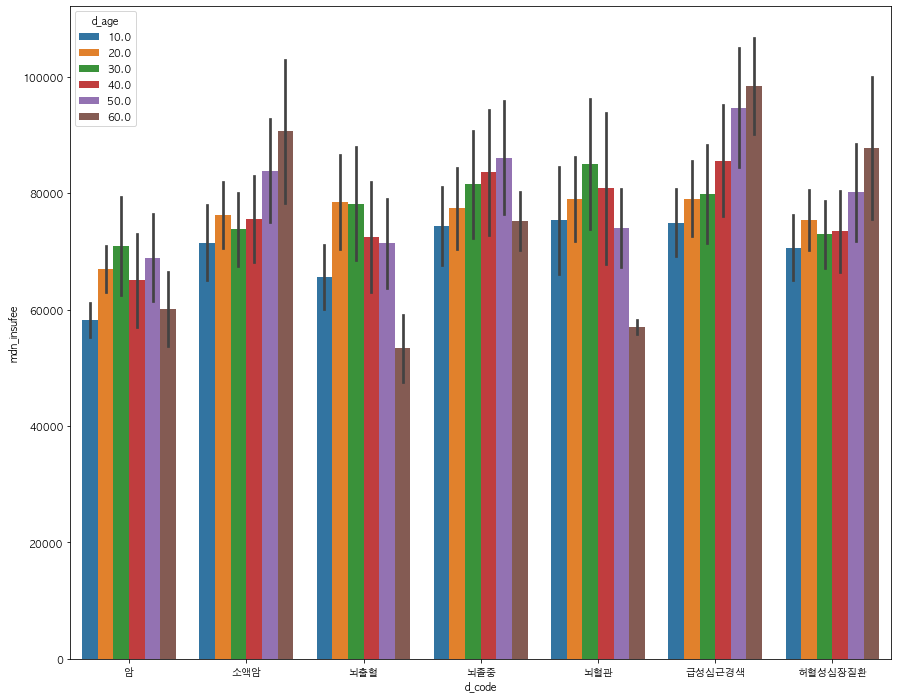

In [8]:
plt.figure(figsize=[50,12])
plt.subplot(131)

sns.barplot('d_code', 'mdn_insufee', hue='d_age', data=raw_data)
plt.xticks([0,1,2,3,4,5,6],['암','소액암','뇌출혈','뇌졸중','뇌혈관','급성심근경색','허혈성심장질환'])

# 아래 factor들 중에서 어떤 factor들을 유효하게 사용할 수 있는지 확인하는 작업 필요

In [9]:
factor_data = pd.read_csv('./mvp_risk_factor.csv')

factor_data = factor_data[factor_data['age_group'].notnull()]
factor_data = factor_data[factor_data['gender'].notnull()]

factor_data['has_insurance'] = factor_data['has_insurance'].astype('float')
factor_data['age_group'] = factor_data['age_group'].astype('float')
factor_data['gender'] = factor_data['gender'].astype('float')
factor_data['has_dependent'] = factor_data['has_dependent'].astype('float')
factor_data['disease'] = factor_data['disease'].astype('float')

factor_data['진료비 총합'] = factor_data['진료비 총합'].astype('float')
factor_data['급여부분 총합'] = factor_data['급여부분 총합'].astype('float')
factor_data['공단 부담금(급여)'] = factor_data['공단 부담금(급여)'].astype('float')

factor_data['민영의료보험 보장금(급여 + 비급여)'] = factor_data['민영의료보험 보장금(급여 + 비급여)'].astype('float')
factor_data['입원시 급여'] = factor_data['입원시 급여'].astype('float')
factor_data['입원시 비급여'] = factor_data['입원시 비급여'].astype('float')
factor_data['평균 통원 일일 비용'] = factor_data['평균 통원 일일 비용'].astype('float')
factor_data['통원비'] = factor_data['통원비'].astype('float')


factor_data['본인부담금 총합'] = factor_data['본인부담금 총합'].astype('float')
factor_data['급여부분 본인부담 총합'] = factor_data['급여부분 본인부담 총합'].astype('float')
factor_data['급여부분 본인부담 입원 총합'] = factor_data['급여부분 본인부담 입원 총합'].astype('float')
factor_data['급여부분 본인부담 통원 총합'] = factor_data['급여부분 본인부담 통원 총합'].astype('float')
factor_data['비급여부분 본인부담 총합'] = factor_data['비급여부분 본인부담 총합'].astype('float')
factor_data['비급여부분 본인부담 입원 총합'] = factor_data['비급여부분 본인부담 입원 총합'].astype('float')
factor_data['비급여부분본인부담 통원 총합'] = factor_data['비급여부분본인부담 통원 총합'].astype('float')

factor_data['보험금 수령후 본인부담금'] = factor_data['보험금 수령후 본인부담금'].astype('float')
# 아래 factor 는 보험금 수령후 본인부담금에 포함되는 항목인지 확인하기
factor_data['보건의료용 건강기능식품 교통비 가족간병비'] = factor_data['보건의료용 건강기능식품 교통비 가족간병비'].astype('float')


factor_data['생애주기 사망확률'] = factor_data['생애주기 사망확률'].astype('float')
factor_data['가족력(부모)'] = factor_data['가족력(부모)'].astype('float')
factor_data['가족력(형제자매)'] = factor_data['가족력(형제자매)'].astype('float')
factor_data['가족력(전체)'] = factor_data['가족력(전체)'].astype('float')


factor_data['입원치료일수'] = factor_data['입원치료일수'].astype('float')
factor_data['통원치료일수'] = factor_data['통원치료일수'].astype('float')
factor_data['요양 치료일수'] = factor_data['요양 치료일수'].astype('float')


factor_data['국민건강보험 민영의료보험 적용 안되는 본인 부담 치료비'] = factor_data['국민건강보험 민영의료보험 적용 안되는 본인 부담 치료비'].astype('float')
factor_data['일반병원 치료기간생활비'] = factor_data['일반병원 치료기간생활비'].astype('float')
factor_data['요양병원 치료기간생활비'] = factor_data['요양병원 치료기간생활비'].astype('float')
factor_data['진단비 필요금액'] = factor_data['진단비 필요금액'].astype('float')

factor_data['보건분야 소비자물가지수'] = factor_data['보건분야 소비자물가지수'].astype('float')
factor_data['생활비 상승률'] = factor_data['생활비 상승률'].astype('float')
factor_data['생애주기중 진단비 최고값'] = factor_data['생애주기중 진단비 최고값'].astype('float')

factor_data['users_reg'] = factor_data['users_reg'].astype('float')
factor_data['min_coverage'] = factor_data['min_coverage'].astype('float')
factor_data['max_coverage'] = factor_data['max_coverage'].astype('float')
factor_data['mdn_coverage'] = factor_data['mdn_coverage'].astype('float')

factor_data.info()
factor_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 58 columns):
has_insurance                           84 non-null float64
age_group                               84 non-null float64
gender                                  84 non-null float64
has_dependent                           84 non-null float64
income                                  0 non-null float64
family_history                          0 non-null float64
disease                                 84 non-null float64
진료비 총합                                  84 non-null float64
급여부분 총합                                 84 non-null float64
공단 부담금(급여)                              84 non-null float64
민영의료보험 보장금(급여 + 비급여)                    84 non-null float64
입원시 급여                                  84 non-null float64
입원시 비급여                                 84 non-null float64
평균 통원 일일 비용                             84 non-null float64
통원비                                     84 non-null float64

,has_insurance,age_group,gender,has_dependent,income,family_history,disease,진료비 총합,급여부분 총합,공단 부담금(급여),...,생애주기중 진단비 최고값,Unnamed: 44,세대주 생활비,월보험료,DB손보기준 \n15세 \n20세 \n30세 \n40세 \n50세 \n60세,users_reg,min_coverage,avg_coverage,max_coverage,mdn_coverage
count,84.0,84.000000,84.000000,84.0,0.0,0.0,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,...,3.500000e+01,3.500000e+01,7.000000e+01,0.0,12.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,8.400000e+01
mean,1.0,35.000000,1.500000,1.0,NaN,NaN,4.000000,4.935001e+06,3.266971e+06,2.816162e+06,...,4.793435e+07,3.210578e+07,3.338472e+07,NaN,15448.250000,87733.345238,66821.428571,1.608267e+07,2.690276e+08,1.398810e+07
std,0.0,17.180824,0.503003,0.0,NaN,NaN,2.012012,4.765353e+06,3.154663e+06,2.855587e+06,...,3.657327e+07,3.084096e+07,1.338996e+07,NaN,11031.156546,93687.445690,153330.115615,7.168557e+06,2.661543e+08,7.054852e+06
min,1.0,10.000000,1.000000,1.0,NaN,NaN,1.000000,4.818730e+05,3.190000e+05,2.260910e+05,...,1.599317e+06,-8.400683e+06,1.833957e+07,NaN,4637.000000,985.000000,0.000000,3.243506e+06,4.000000e+07,2.000000e+06
25%,1.0,20.000000,1.000000,1.0,NaN,NaN,2.000000,1.720378e+06,1.138890e+06,9.031085e+05,...,3.051156e+06,-9.488440e+05,2.101722e+07,NaN,7383.250000,8285.250000,0.000000,1.009292e+07,6.000000e+07,1.000000e+07
50%,1.0,35.000000,1.500000,1.0,NaN,NaN,4.000000,3.246566e+06,2.149227e+06,1.624904e+06,...,4.797755e+07,2.981876e+07,3.162404e+07,NaN,11527.500000,59181.500000,0.000000,1.692610e+07,1.425000e+08,1.000000e+07
75%,1.0,50.000000,2.000000,1.0,NaN,NaN,6.000000,6.641256e+06,4.396512e+06,3.962043e+06,...,6.556522e+07,4.927684e+07,3.833907e+07,NaN,20571.000000,136387.250000,100000.000000,2.195591e+07,4.106538e+08,2.000000e+07
max,1.0,60.000000,2.000000,1.0,NaN,NaN,7.000000,2.483560e+07,1.644117e+07,1.528977e+07,...,1.387545e+08,1.137545e+08,7.884236e+07,NaN,38474.000000,371512.000000,1000000.000000,2.950456e+07,8.888880e+08,3.000000e+07


# 확인해보고 싶은 사항들
1. 연령대별 각 보험에 가입을 했을 때 <-> 하지 않았을 때의 개인 부담금의 차이 확인
    어차피 이 비용이라는 부분에 (입원비, 진단비 등등) 다 들어갈테니 따로 구분해서 확인하지 않아도 괜찮지 않을까라는 생각
2. 연령대별 각 질병에 대한 치사율 확인 -> 치사율의 편차가 작다면 크게 의미가 없는 요소, 반대로 편차가 크다면 각 연령대별로 스코어링 필요
3. 

# 1. 민영 보험에 가입 여부에 따른 진단비에 대한 개인 부담금 차이(연령별)
## 고려해야 하는 factor
1. 본인부담금 총합 -> 보험에 가입하지 않았을 때 사용
2. 보험금 수령후 본인 부담금 -> 보험에 가입했을 때 사용

## 추후 고려 대상인 factor
1. income : 수입에 따라 개인 부담금에 대한 부담감 편차가 클 수 있음
2. has_dependent : 부양해야하는 가족의 수도 income의 요소와 동일한 작용을 할 수 있음


[Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성심근경색'),
 Text(0, 0, '허혈성심장질환'),
 Text(0.0, 0, '암'),
 Text(0.2, 0, '소액암'),
 Text(0.4, 0, '뇌출혈'),
 Text(0.6000000000000001, 0, '뇌졸중'),
 Text(0.8, 0, '뇌혈관'),
 Text(1.0, 0, '급성

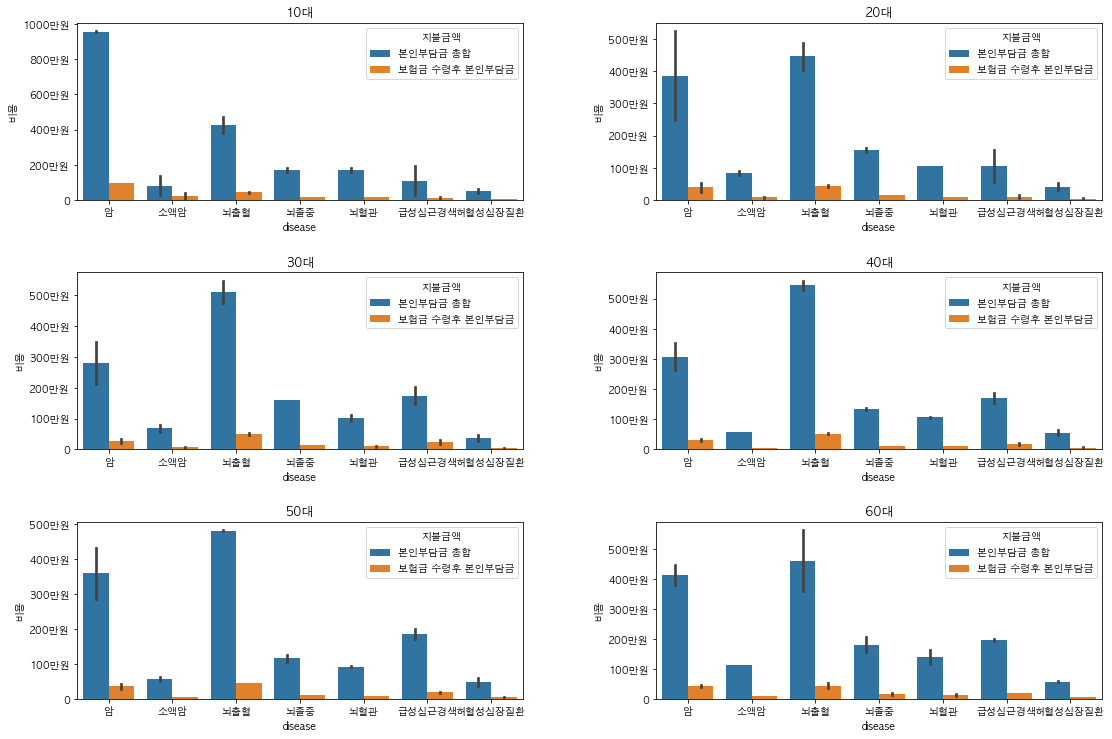

In [10]:
f, ax = plt.subplots(3, 2, figsize=(15,10))
plt.tight_layout(h_pad=5, w_pad=10)
# 성별을 구분하지 않음
# sns.barplot('d_code', 'cnt', data=sampling_data, ax=ax[0])

age_10_data = factor_data[factor_data['age_group'].isin(['10.0'])]
age_20_data = factor_data[factor_data['age_group'].isin(['20.0'])]
age_30_data = factor_data[factor_data['age_group'].isin(['30.0'])]
age_40_data = factor_data[factor_data['age_group'].isin(['40.0'])]
age_50_data = factor_data[factor_data['age_group'].isin(['50.0'])]
age_60_data = factor_data[factor_data['age_group'].isin(['60.0'])]


from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e6]
    suffix  = ["00만원"]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    if str(val).split(".")[1] == "0":
                       return '{val:d}{suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y


ax[0][0].yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax[0][1].yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax[1][0].yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax[1][1].yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax[2][0].yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax[2][1].yaxis.set_major_formatter(FuncFormatter(y_fmt))


ax[0][0].title.set_text('10대')
ax[0][1].title.set_text('20대')
ax[1][0].title.set_text('30대')
ax[1][1].title.set_text('40대')
ax[2][0].title.set_text('50대')
ax[2][1].title.set_text('60대')


sampling_data = pd.DataFrame(factor_data, columns=['age_group', 'disease', '본인부담금 총합','보험금 수령후 본인부담금'])
age_10_data = sampling_data[sampling_data['age_group'].isin(['10.0'])]
age_20_data = sampling_data[sampling_data['age_group'].isin(['20.0'])]
age_30_data = sampling_data[sampling_data['age_group'].isin(['30.0'])]
age_40_data = sampling_data[sampling_data['age_group'].isin(['40.0'])]
age_50_data = sampling_data[sampling_data['age_group'].isin(['50.0'])]
age_60_data = sampling_data[sampling_data['age_group'].isin(['60.0'])]

age_10_data = age_10_data.iloc[:,1:].melt('disease', var_name='지불금액', value_name='비용')
age_20_data = age_20_data.iloc[:,1:].melt('disease', var_name='지불금액', value_name='비용')
age_30_data = age_30_data.iloc[:,1:].melt('disease', var_name='지불금액', value_name='비용')
age_40_data = age_40_data.iloc[:,1:].melt('disease', var_name='지불금액', value_name='비용')
age_50_data = age_50_data.iloc[:,1:].melt('disease', var_name='지불금액', value_name='비용')
age_60_data = age_60_data.iloc[:,1:].melt('disease', var_name='지불금액', value_name='비용')

sns.barplot('disease', '비용', hue='지불금액', data=age_10_data, ax=ax[0][0])
sns.barplot('disease', '비용', hue='지불금액', data=age_20_data, ax=ax[0][1])
sns.barplot('disease', '비용', hue='지불금액', data=age_30_data, ax=ax[1][0])
sns.barplot('disease', '비용', hue='지불금액', data=age_40_data, ax=ax[1][1])
sns.barplot('disease', '비용', hue='지불금액', data=age_50_data, ax=ax[2][0])
sns.barplot('disease', '비용', hue='지불금액', data=age_60_data, ax=ax[2][1])
plt.setp(ax,xticklabels=['암','소액암','뇌출혈','뇌졸중','뇌혈관','급성심근경색','허혈성심장질환'])

# 질병에 대한 연령별 치사율

(11.5, 12.5)

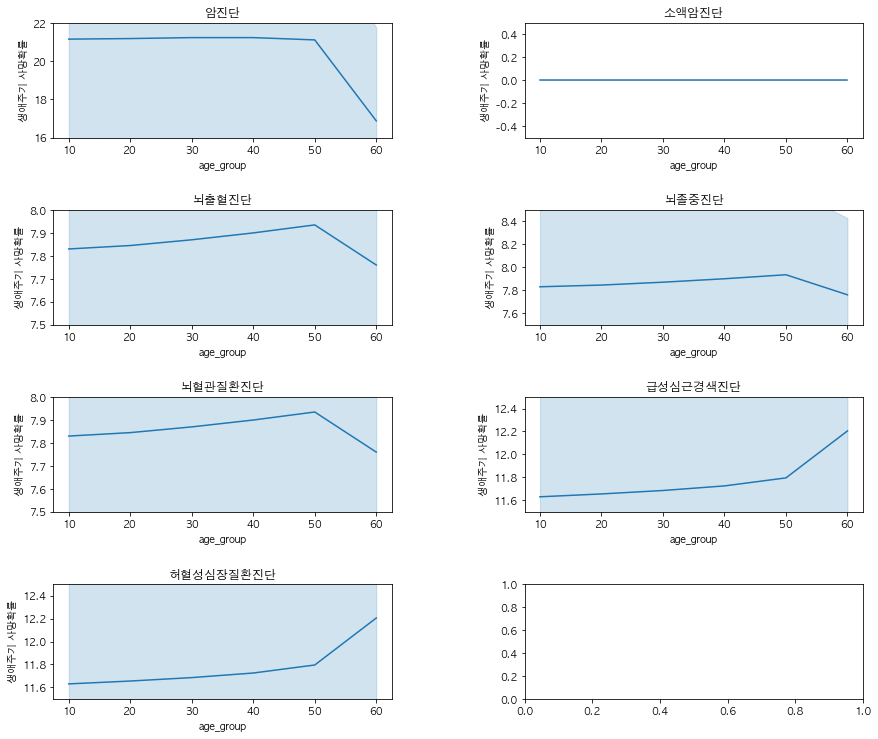

In [11]:
f, ax = plt.subplots(4, 2, figsize=(12,10))
plt.tight_layout(h_pad=5, w_pad=10)

disease1_data = factor_data[factor_data['disease'].isin(['1.0'])]
disease2_data = factor_data[factor_data['disease'].isin(['2.0'])]
disease3_data = factor_data[factor_data['disease'].isin(['3.0'])]
disease4_data = factor_data[factor_data['disease'].isin(['4.0'])]
disease5_data = factor_data[factor_data['disease'].isin(['5.0'])]
disease6_data = factor_data[factor_data['disease'].isin(['6.0'])]
disease7_data = factor_data[factor_data['disease'].isin(['7.0'])]

ax[0][0].title.set_text('암진단')
ax[0][1].title.set_text('소액암진단')
ax[1][0].title.set_text('뇌출혈진단')
ax[1][1].title.set_text('뇌졸중진단')
ax[2][0].title.set_text('뇌혈관질환진단')
ax[2][1].title.set_text('급성심근경색진단')
ax[3][0].title.set_text('허혈성심장질환진단')

sns.lineplot('age_group', '생애주기 사망확률', data=disease1_data, ax=ax[0][0])
sns.lineplot('age_group', '생애주기 사망확률', data=disease2_data, ax=ax[0][1])
sns.lineplot('age_group', '생애주기 사망확률', data=disease3_data, ax=ax[1][0])
sns.lineplot('age_group', '생애주기 사망확률', data=disease4_data, ax=ax[1][1])
sns.lineplot('age_group', '생애주기 사망확률', data=disease5_data, ax=ax[2][0])
sns.lineplot('age_group', '생애주기 사망확률', data=disease6_data, ax=ax[2][1])
sns.lineplot('age_group', '생애주기 사망확률', data=disease7_data, ax=ax[3][0])

ax[0][0].set_ylim(16,22)
ax[0][1].set_ylim(-0.5,0.5)
ax[1][0].set_ylim(7.5,8)
ax[1][1].set_ylim(7.5,8.5)
ax[2][0].set_ylim(7.5,8)
ax[2][1].set_ylim(11.5,12.5)
ax[3][0].set_ylim(11.5,12.5)

# TODO
1. 점수화에 필요한 의미있는 factor 선정과 근거 마련
2. Model 3 구현을 위해 각 factor들 간의 상관관계 정리 필요
3. 가중치는 임의로 수정? (일단은 random하게 적용 후 피드백 받아서 수정)

# Risk Score Modeling
 
## Model 1 (input / output layer만 있는 모델)
* risk_score = Σ(d_risk_score * d_w)
* d_risk_score = f<sub>1</sub> * w<sub>1</sub> + f<sub>2</sub> * w<sub>2</sub> + ... + f<sub>n</sub> * w<sub>n</sub>

* 변수 정의
    * d_risk_score : 진단별 리스크 점수
    * d_w : 진단별 가중치
    * f : factor 를 0~1로 정규화한 값 (ex : 나이, 본인부담금, 가족력 등등)
    * w : weight
    * b : bias (아직 추가되지 않음)


## Model 2 (Score Table 모델)
각 Factor들에 대한 구간을 설정하고 구간별로 점수 테이블 생성

구간 설정과, 구간에 대한 점수만 설정된다면 가장 간단할 것이라고 생각됨


## Model 3 (상관관계에 대해 1개의 Hidden Layer를 추가한 모델)
* risk_score = Σ(d_risk_score * d_w)
* d_risk_score = h_f<sub>1</sub> * h_w<sub>1</sub> + h_f<sub>2</sub> * h_w<sub>2</sub> + ... +h_f<sub>n</sub> * h_w<sub>n</sub>
* h_f<sub>i</sub> = f<sub>i1</sub> * w<sub>i1</sub> + f<sub>i2</sub> * w<sub>i2</sub> + ... + f<sub>in</sub> * w<sub>in</sub>

* 변수 정의
    * d_risk_score : 진단별 리스크 점수
    * d_w : 진단별 가중치
    * h_f : hidden layer node 의 socre
    * h_w : hidden layer node 의 weight
    * f<sub>i</sub> : factor 를 0~1로 정규화한 값 (ex : 나이, 본인부담금, 가족력 등등)
    * w : weight
    * b : bias (아직 추가되지 않음)


# Factor 선정
* 나이
    * age_gruop


* 진료비 부분
    * 질병별 보험금 수령전 본인부담금 - 본인부담금 총합
    * 질병별 보험금 수령후 본인부담금 - 보험금 수령후 본인부담금
        * 수령전과 수령후 모두 받는 이유는 보장 금액이 너무 작을 경우 이 편차를 고려하기 위해


* 치사 부분
    * 질병별 치사율 - 생애주기 사망확률
    * 가족력 - 가족력(부모), 가족력(형제자매), 가족력(전체)


* 진단비 부분
    * 진단비 필요금액(국민건강보험, 민영의료보험 적용 안되는 본인 부담 치료비 + 일반병원 치료기간 생활비 + 요양병원 치료기간 생활비)
    
    
* 추후 고려 대상
    * 수입 - imcome
    * 부양 가족 수 - has_dependent
    * 실제 고객이 부담 가능한 보험료 - 컬럼에 없음(이건 상품 추천시 고려?)



# Model 1 테스트

In [65]:
# 해당 모델에서 사용할 데이터
model_data = pd.DataFrame(factor_data, 
                          columns=['age_group', '본인부담금 총합','보험금 수령후 본인부담금', '생애주기 사망확률'
                                   ,'가족력(부모)', '가족력(형제자매)', '가족력(전체)', '진단비 필요금액'])

model_data.info()
model_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 8 columns):
age_group        84 non-null float64
본인부담금 총합         84 non-null float64
보험금 수령후 본인부담금    84 non-null float64
생애주기 사망확률        84 non-null float64
가족력(부모)          84 non-null float64
가족력(형제자매)        84 non-null float64
가족력(전체)          84 non-null float64
진단비 필요금액         84 non-null float64
dtypes: float64(8)
memory usage: 5.9 KB


,age_group,본인부담금 총합,보험금 수령후 본인부담금,생애주기 사망확률,가족력(부모),가족력(형제자매),가족력(전체),진단비 필요금액
count,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01
mean,35.000000,2.118839e+06,211069.916667,9.656667,16.712262,17.645119,20.568214,1.232536e+07
std,17.180824,1.926697e+06,193252.066586,6.194205,16.131880,15.787243,22.932357,1.066156e+07
min,10.000000,2.557820e+05,22733.000000,0.000000,0.000000,0.000000,0.000000,3.462370e+05
25%,20.000000,7.864882e+05,74281.000000,7.097500,9.177500,11.145000,11.145000,9.278478e+05
50%,35.000000,1.532811e+06,147933.500000,8.660000,11.195000,13.595000,13.595000,1.127652e+07
75%,50.000000,2.679213e+06,322273.000000,13.067500,19.640000,19.640000,19.640000,1.768668e+07
max,60.000000,9.584951e+06,974156.000000,26.730000,66.830000,66.830000,93.560000,4.886271e+07


# 데이터 정규화

In [128]:
unformat_data = []

# 데이터 정규화
# (x - x_min) / (x_max - x_min)
for count in range(len(model_data.columns)):
    v_min = model_data.iloc[:,[count]].min()
    v_max = model_data.iloc[:,[count]].max()
    
    s_data = []
    for idx, row in model_data.iterrows():
        norm_value = (row[count]-v_min) / (v_max-v_min)
        s_data.append(float(norm_value))
    
    unformat_data.append(s_data)

# 행렬 뒤집기
unformat_data = list(map(list, zip(*unformat_data)))

# pandas 포맷으로 변환
norm_data = pd.DataFrame(data=unformat_data, columns=(model_data.columns))
norm_data    

,age_group,본인부담금 총합,보험금 수령후 본인부담금,생애주기 사망확률,가족력(부모),가족력(형제자매),가족력(전체),진단비 필요금액
0,0.0,1.000000,0.996356,0.986906,0.986832,0.986832,0.986853,0.262155
1,0.0,0.116711,0.413843,0.000000,0.000000,0.000000,0.000000,0.008791
2,0.0,0.476777,0.466627,0.263749,0.136466,0.165644,0.118320,0.177156
3,0.0,0.169128,0.160721,0.263749,0.136466,0.165644,0.118320,0.166087
4,0.0,0.140879,0.138173,0.263749,0.136466,0.165644,0.118320,0.171439
...,...,...,...,...,...,...,...,...
79,1.0,0.577391,0.530233,0.315376,0.163100,0.198115,0.141513,0.178041
80,1.0,0.194338,0.175091,0.315376,0.163100,0.198115,0.141513,0.145243
81,1.0,0.148957,0.132664,0.315376,0.163100,0.198115,0.141513,0.146833
82,1.0,0.181771,0.179461,0.513655,0.308245,0.308245,0.220180,0.130798


# Model 1 Scroing 결과

In [144]:
import numpy as np

def mat_mul(mat1, mat2):
    return np.matmul(np.array(mat1, dtype=np.float64), np.array(mat2, dtype=np.float64))


# 질병 개수
num_disease = 7

# factor 개수
num_factor = 87

# weight : 진단별 age_group, 본인부담금 총합, 보험금 수령후 본인부담금, 사망확률, 가족력-부모, 가족력-형제, 가족력-전체, 진단비 필요금액
# 순서 : 암, 소액암, 뇌출혈, 뇌졸중, 뇌혈관질환, 급성심근경색, 허혈성심장질환
weight = [
    [4,5,5,4,4,4,5,5],
    [1,1,2,1,3,3,3,2],
    [4,3,3,2,1,1,1,3],
    [4,4,3,2,1,1,1,3],
    [4,5,4,2,1,1,1,4],
    [5,3,3,2,3,3,3,3],
    [4,4,3,2,5,5,5,4]
]

disease_weight = [
    5,1,2,3,4,3,4
]

# 최저 weight 테스트
weight = [
    [1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1]
]
# disease_weight = [
#     1,1,1,1,1,1,1
# ]

# 최고 weight 테스트
# weight = [
#     [5,5,5,5,5,5,5,5],
#     [5,5,5,5,5,5,5,5],
#     [5,5,5,5,5,5,5,5],
#     [5,5,5,5,5,5,5,5],
#     [5,5,5,5,5,5,5,5],
#     [5,5,5,5,5,5,5,5],
#     [5,5,5,5,5,5,5,5]
# ]
# disease_weight = [
#     5,5,5,5,5,5,5
# ]

# bias
bais = [
    
]

r = []
for idx, row in norm_data.iterrows():
    score = 0
    for pivot, w in enumerate(weight[idx%7]):
        score += row[pivot]*w
    r.append(score)


risk_score_list = []
for i in range(int(len(r)/num_disease)):
    risk_score = mat_mul(r[(i*num_disease):(i*num_disease)+num_disease], np.transpose(disease_weight))
    risk_score_list.append('{:.2f}'.format(risk_score))
    

age = [10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60]
gender = ['남', '여', '남', '여', '남', '여', '남', '여', '남', '여', '남', '여']

result_data = [age, gender, risk_score_list]
result_data = list(map(list, zip(*result_data)))

risk_data = pd.DataFrame(data=result_data, columns=['나이', '성별', '점수'])
risk_data

# 최저 : 11.78
# 최고 : 479.72

,나이,성별,점수
0,10,남,63.94
1,10,여,54.80
2,20,남,58.11
3,20,여,46.81
4,30,남,57.14
5,30,여,47.45
6,40,남,57.13
7,40,여,48.09
8,50,남,57.43
9,50,여,47.86


# Model 3(상관 계수에 따른 MLP 모델)

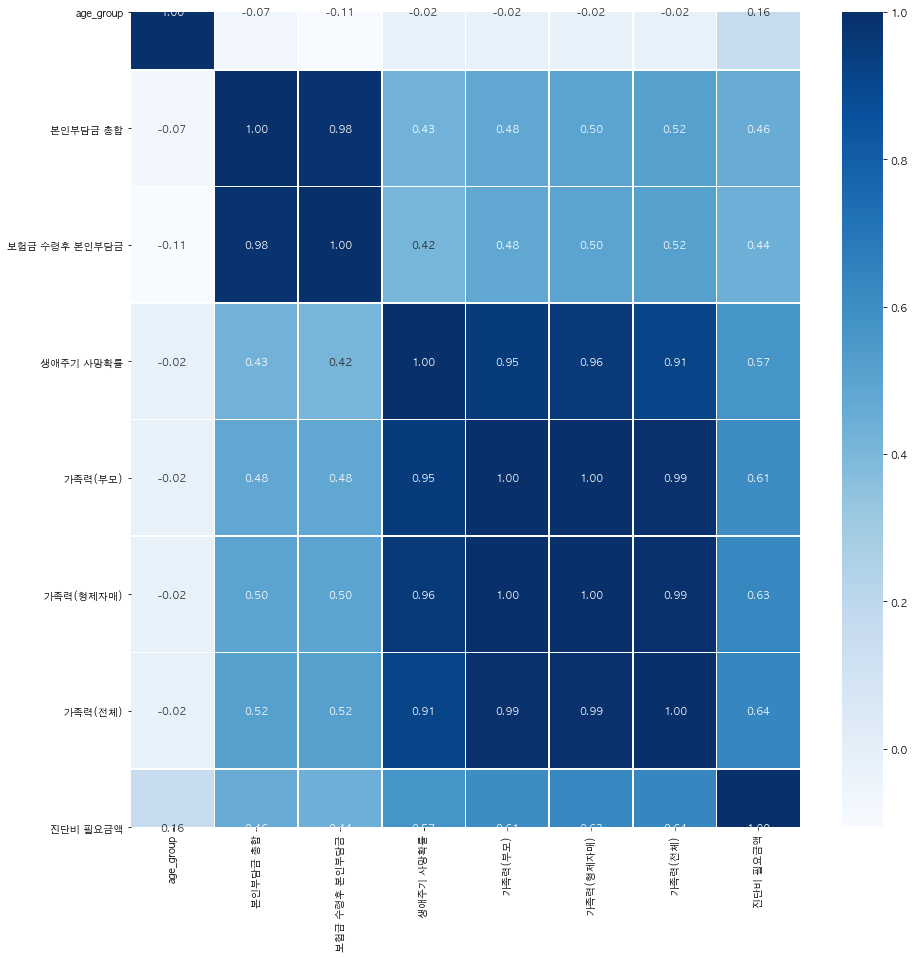

In [56]:
# Model 2, 3 대비 상관 관계도 분석

# Factor 간 피어슨 상관계수
plt.figure(figsize=(15,15))
sns.heatmap(data = model_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# 상관관계 정의

**기준 : 0.5 이상의 지표**
1. \[본인 부담금 총합, 보험금 수령후 본인 부담금, 가족력(형제자매), 가족력(전체) \] => node 1
2. \[생애주기 사망확률, 가족력(부모), 가족력(형제자매), 가족력(전체), 진단비 필요금액\] => node 2
3. age_group => node 3

## Hidden Layer의 노드는 총 3개

In [145]:
import numpy as np

def mat_mul(mat1, mat2):
    return np.matmul(np.array(mat1, dtype=np.float64), np.array(mat2, dtype=np.float64))


# 질병 개수
num_disease = 7

# factor 개수
num_factor = 87

# model3_data
# 해당 모델에서 사용할 데이터
model3_data = pd.DataFrame(factor_data, 
                          columns=['본인부담금 총합','보험금 수령후 본인부담금', '가족력(형제자매)', '가족력(전체)', '생애주기 사망확률', 
                                   '가족력(부모)', '가족력(형제자매)', '가족력(전체)', '진단비 필요금액', 'age_group'])

unformat_data = []

# 데이터 정규화
# (x - x_min) / (x_max - x_min)
for count in range(len(model3_data.columns)):
    v_min = model3_data.iloc[:,[count]].min()
    v_max = model3_data.iloc[:,[count]].max()
    
    s_data = []
    for idx, row in model3_data.iterrows():
        norm_value = (row[count]-v_min) / (v_max-v_min)
        s_data.append(float(norm_value))
    
    unformat_data.append(s_data)

# 행렬 뒤집기
unformat_data = list(map(list, zip(*unformat_data)))

# pandas 포맷으로 변환
norm_data = pd.DataFrame(data=unformat_data, columns=(model3_data.columns))

''' node 별 weight 구분
진단별 age_group, 본인부담금 총합, 보험금 수령후 본인부담금, 사망확률, 가족력-부모, 가족력-형제, 가족력-전체, 진단비 필요금액
1 본인 부담금 총합
2 보험금 수령후 본인 부담금
3 가족력(형제자매)
4 가족력(전체)

5 생애주기 사망확률
6 가족력(부모)
7 가족력(형제자매)
8 가족력(전체)
9 진단비 필요금액

10 나이
'''

# 행 순서 : 암, 소액암, 뇌출혈, 뇌졸중, 뇌혈관질환, 급성심근경색, 허혈성심장질환
# 열은 위의 주석 참조
weight = [
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1]
]

# node 개수 3개
# 1. [본인 부담금 총합, 보험금 수령후 본인 부담금, 가족력(형제자매), 가족력(전체)]
# 2. [생애주기 사망확률, 가족력(부모), 가족력(형제자매), 가족력(전체), 진단비 필요금액]
# 3. age_group
h_weight = [
    [1,1,1]
]

disease_weight = [
    5,1,2,3,4,3,4
]


# bias
bais = [
    
]

r = []
for idx, row in norm_data.iterrows():
    node = [0,0,0]
    for pivot, w in enumerate(weight[idx%7]):
        if pivot < 4:
            node[0] += row[pivot]*w
        elif pivot >= 4 and pivot < 9:
            node[1] += row[pivot]*w
        elif pivot >= 9:
            node[2] += row[pivot]*w
    
    r.append(node)


# hidden layer node 값 설정
h_node = []
for i in range(int(len(r)/num_disease)):
    hidden = mat_mul(r[(i*num_disease):(i*num_disease)+num_disease], np.transpose(h_weight))
    h_node.append(hidden)

    
# y값 설정
y = []
for mat in h_node:
    y.append('{:.2f}'.format(np.matmul(np.transpose(mat), np.array(disease_weight, dtype=np.float64))[0]))


age = [10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60]
gender = ['남', '여', '남', '여', '남', '여', '남', '여', '남', '여', '남', '여']

result_data = [age, gender, y]
result_data = list(map(list, zip(*result_data)))

risk_data = pd.DataFrame(data=result_data, columns=['나이', '성별', '점수'])
risk_data

,나이,성별,점수
0,10,남,67.28
1,10,여,58.11
2,20,남,67.25
3,20,여,55.70
4,30,남,74.47
5,30,여,63.07
6,40,남,81.56
7,40,여,68.12
8,50,남,85.34
9,50,여,71.17
